# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercizio 2 </span>


### Esercizio 2.1
Si è calcolato con tecnica Montecarlo l'integrale $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ 
Stimiamo il valore dell'integrale con il metodo della media: $\\$ ogni passo Montecarlo consiste in
- estrarre nell'intervallo di integrazione tramite una distribuzione uniforme
- valutare la funzione nel punto estratto

Sono stati eseguiti $M=10^6$ passi Montecarlo, su cui abbiamo  fatto l'analisi statistica utilizzando il metodo della media a blocchi con $ N_{blocchi}=100$ 

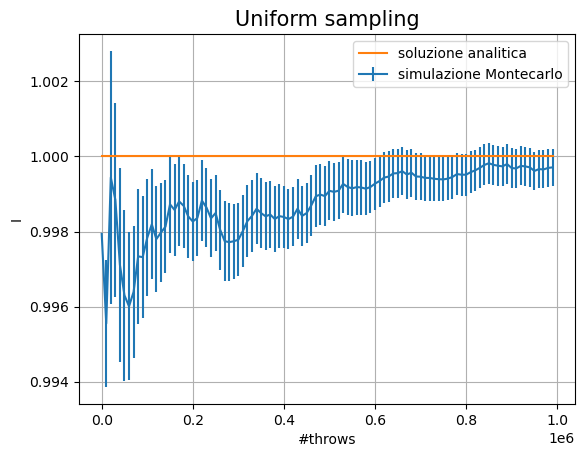

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('2.1/unif.dat')

x*=10000

plt.errorbar(x,data[:,0], yerr=data[:,1], label= 'simulazione Montecarlo')
plt.xlabel('#throws')
y= np.full(100, 1)
plt.plot(x, y, label= 'soluzione analitica')
plt.ylabel('I')
plt.title ('Uniform sampling', fontsize= 15)
plt.grid(True)
plt.legend()
plt.show()

 Risultati: $ I= 0.99971 \pm 0.000499 $, in accordo con il risultato aspettato

Abbiamo poi ripetuto il procedimento ma questa volta estraendo il punto dove valutare l'integrale da una distribuzione del tipo $$ d(x)= 2(1-x)$$ che corrisponde allo sviluppo di Taylor dell'integranda, questo metodo, chiamato **importance sampling**, permette di aumentare la precisione della nostra stima, riscrivendo infatti l'integrale come $$I = \int_0^1 \frac{g(x)p(x)}{d(x)}d(x) dx $$ dove $g(x)$ è la funzione di cui vogliamo stimare l'integrale, $p(x)$ è la distribuzione uniforme e $d(x)$ è scelta in modo da minimizzare la varianza. Il suo minimo è zero e si trova per $d(x)= g(x)$, ma questo corrisponde al caso in cui il risultato dell'integrale è noto, deduciamo quindi che una buona scelta di d(x) è una funzione che approssimi bene l'integranda, da qui la scelta di $d(x)$ come sviluppo di Taylor

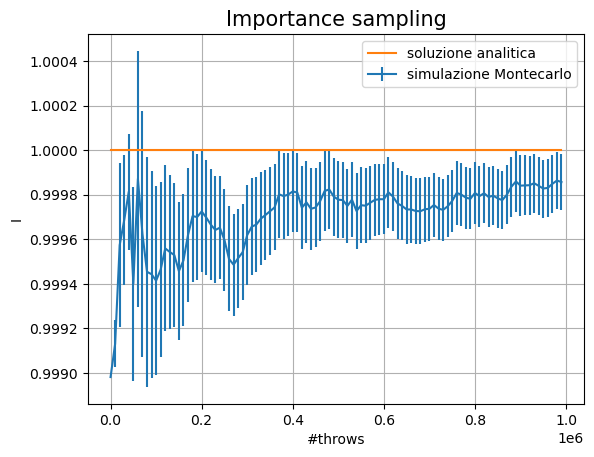

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)

# Carica i dati dal file
data = np.loadtxt('2.1/importance.dat')

x*=10000

plt.errorbar(x,data[:,0],yerr=data[:,1], label='simulazione Montecarlo')
plt.plot(x,y, label= 'soluzione analitica')
plt.xlabel('#throws')
plt.ylabel('I')
plt.title('Importance sampling', fontsize= 15)
plt.legend()
plt.grid(True)
plt.show()

Risultati: $I= 0.999857 \pm 0.000127$ dove possiamo osservare che l'incertezza (a parità di passi Montecarlo) si è ridotta di un quinto, come atteso

### Esercizio 2.2
Di seguito viene simulato un cammino in uno spazio 3D in cui la direzione di ognuno dei 100 passi, la cui dimensione è fissata, è estratta casualmente
1. fra uno degli assi cartesiani lungo i quali è possibile muoversi sia in avanti sia indietro
2. in una qualsiasi direzione dello spazione determinata da due angoli


I 100 passi del cammino costituiscono un passo Montecarlo che viene ripetuto $10^5$ volte, viene infine eseguita la media dividendo la totalità dei lanci in $M=100$ blocchi.
Viene di seguito riportata la media in funzione del numero dei passi nei due casi

Continuo: 
k =  0.995176
incertezza sul parametro =  [0.000121]
Discreto: 
k =  0.99498
incertezza sul parametro =  [0.000121]


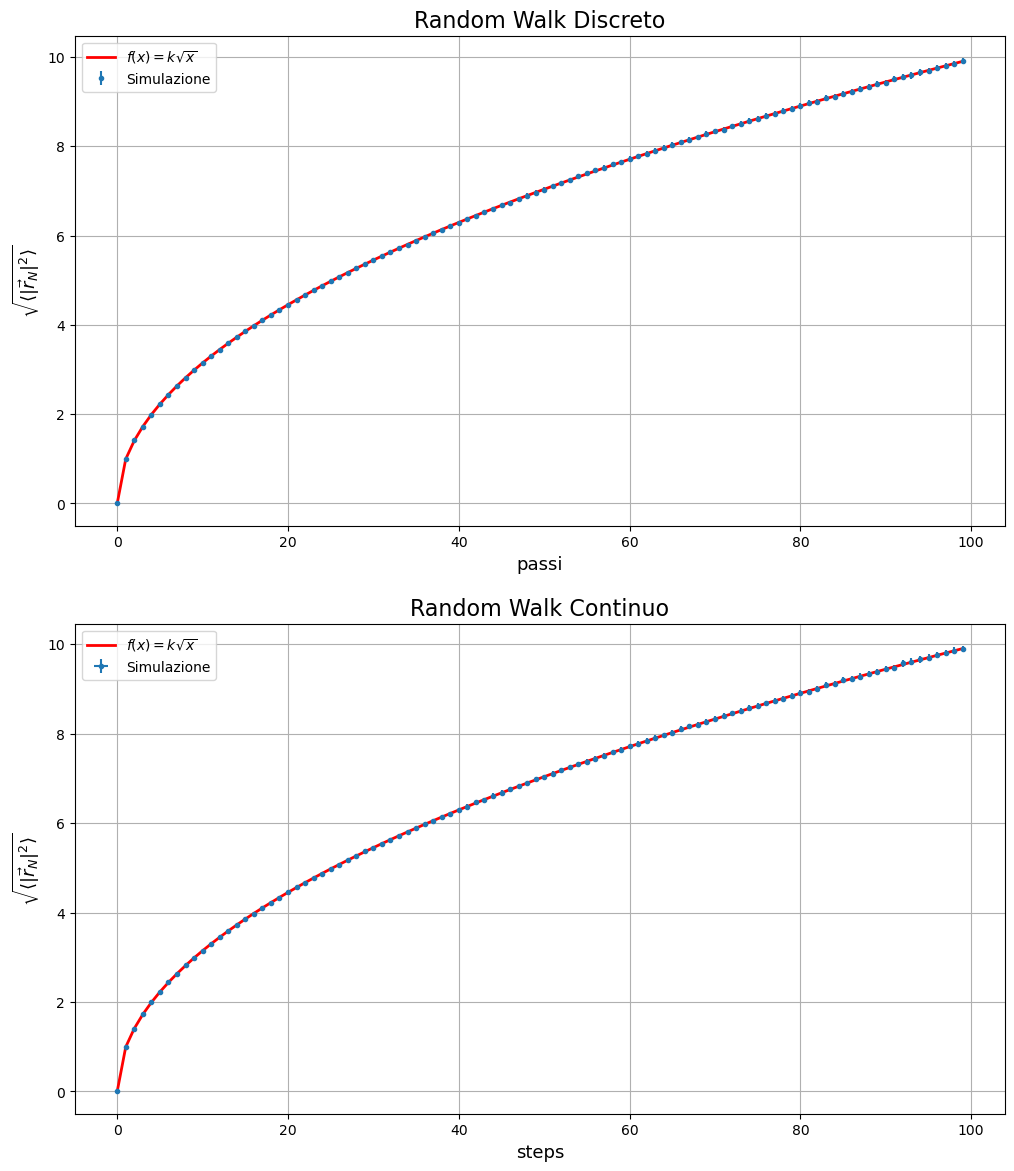

In [152]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x,k):
    return k*(x**0.5)

#loading and fitting data
yD, errD = np.loadtxt("2.2/randomwalkdiscreto.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yD.size)
yC, errC = np.loadtxt("2.2/randomwalkcontinuo.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yC.size)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])


#continuos fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)
y_fitD = f(x,p_opt_cont[0])

#graphing
plt.figure(figsize=(12,14))

plt.subplot(211)
plt.errorbar(x,yD,errD,fmt='.',label='Simulazione')
plt.grid(True)
plt.xlabel('passi',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Random Walk Discreto",fontsize=16)
plt.plot(x,y_fitD,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()



plt.subplot(212)
plt.errorbar(x,yC,xerr=0, yerr=errC,fmt='.',label='Simulazione')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Random Walk Continuo",fontsize=16)

plt.plot(x,y_fit,'r',linewidth=2,label='$f(x)=k\sqrt{x}$') # plotting fitted function
plt.legend()
print("Continuo: ")
print("k = ",np.round(p_opt_cont[0],6))
print("incertezza sul parametro = ",np.round(np.sqrt(p_cov_cont[0]),6) )

print("Discreto: ")
print("k = ",np.round(p_opt_disc[0],6))
print("incertezza sul parametro = ",np.round(np.sqrt(p_cov_disc[0]),6) )

plt.show()

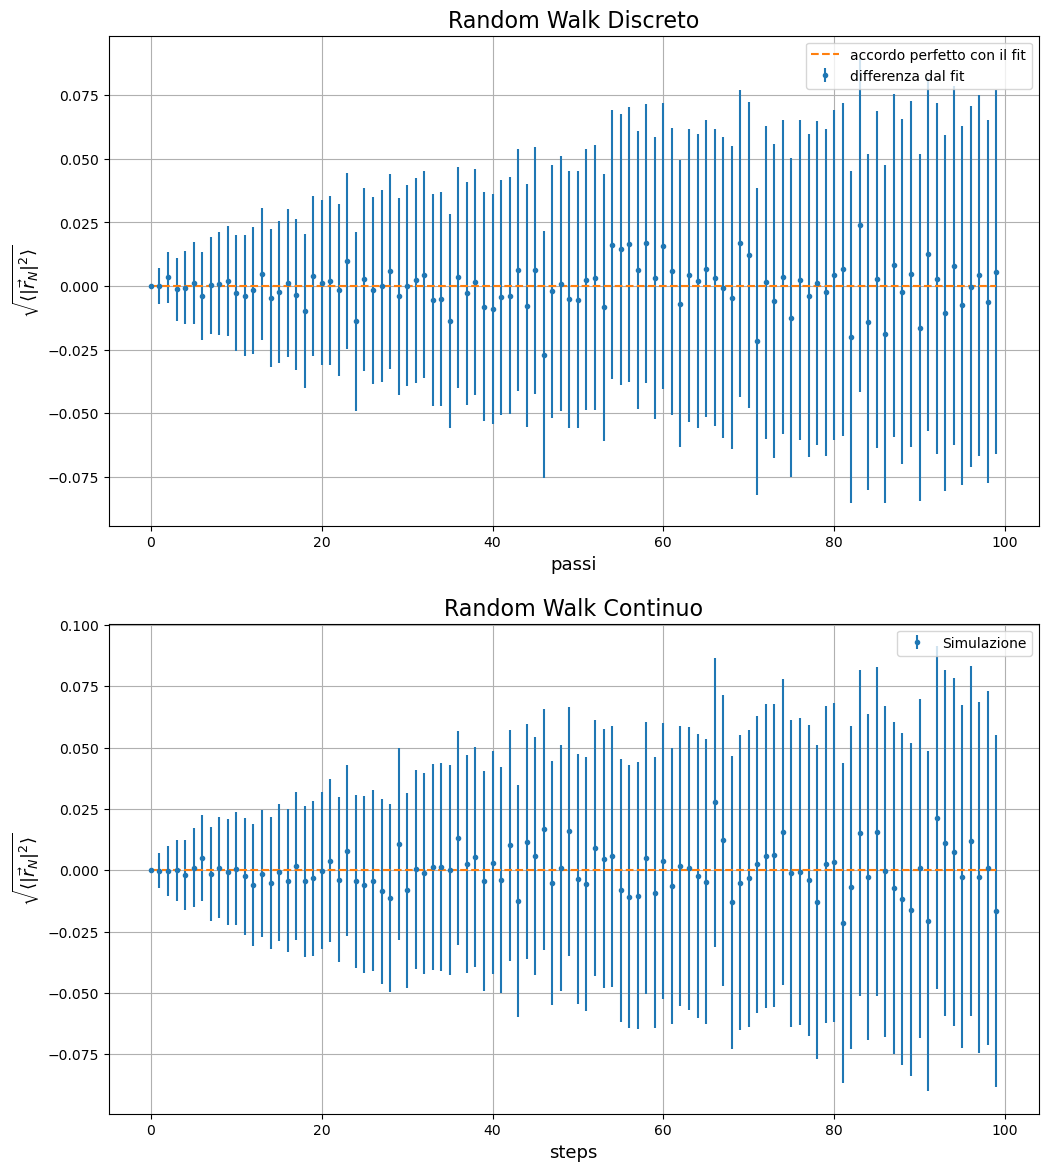

In [153]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f (x,k):
    return k*(x**0.5)

#loading and fitting data
yD, errD = np.loadtxt("2.2/randomwalkdiscreto.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yD.size)
yC, errC = np.loadtxt("2.2/randomwalkcontinuo.dat", usecols=(0,1), delimiter=' ', unpack=True)
x      = np.arange(yC.size)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])


#continuos fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)
y_fit = f(x,p_opt_cont[0])
print ()
#graphing
plt.figure(figsize=(12,14))

plt.subplot(211)
plt.errorbar(x,yD-f(x,p_opt_disc[0]),errD,fmt='.',label='differenza dal fit')
z=np.full(100, 0)
plt.plot(x, z, '--', label='accordo perfetto con il fit')

plt.grid(True)
plt.xlabel('passi',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Random Walk Discreto",fontsize=16)
y_fitD = f(x,p_opt_disc)

plt.legend()



plt.subplot(212)
plt.errorbar(x,yC-f(x, p_opt_cont[0]), yerr=errC,fmt='.',label='Simulazione')
plt.grid(True)
plt.xlabel('steps',fontsize=13)
plt.plot(x, z, '--')
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.title("Random Walk Continuo",fontsize=16)
y_fitC = f(x,p_opt_cont)

plt.legend()


plt.show()

L'aumentare dell'incertezza all'aumentare del numero di passi è tipico di un processo diffusivo.